# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [5]:
spaceship.shape

# 8693 rows, 14 columns

(8693, 14)

**Check for data types**

In [7]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [8]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [11]:
# Drop rows with missing values across the specified columns
spaceship_cleaned = spaceship.dropna(subset=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 
                                'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'])

# Checking again for missing values = no more missing values
spaceship_cleaned.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [13]:
# Select only numerical columns as features
numerical_features = spaceship_cleaned.select_dtypes(include=['int', 'float'])

# Check the selected numerical features
numerical_features

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


And also lets define our target.

In [14]:
# Define the target variable
target = spaceship_cleaned['Transported']

# Check the target variable
target


0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6606, dtype: bool

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_features, target, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5284, 6)
Shape of X_test: (1322, 6)
Shape of y_train: (5284,)
Shape of y_test: (1322,)


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [19]:
from sklearn.neighbors import KNeighborsClassifier


# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

Fit the model to your data.

In [20]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate your model.

In [21]:
pred = knn.predict(X_test)
pred

array([ True,  True,  True, ...,  True,  True, False])

In [22]:
# Comparing with the true labels

y_test.values

array([ True,  True,  True, ...,  True,  True,  True])

In [26]:
comparison_df = pd.DataFrame(y_test).copy()
comparison_df['pred'] = pred
comparison_df

,Transported,pred
8441,True,True
8058,True,True
320,True,True
2548,False,False
8027,False,False
...,...,...
7668,True,True
1697,False,False
546,True,True
4895,True,True


In [30]:
comparison_df['Transported'].value_counts()

Transported
True     669
False    653
Name: count, dtype: int64

In [31]:
comparison_df['pred'].value_counts()

pred
True     721
False    601
Name: count, dtype: int64

In [32]:
# In order to evaluate our model, we will use the method "score" that will give us accuracy

knn.score(X_test, y_test)

0.7760968229954615

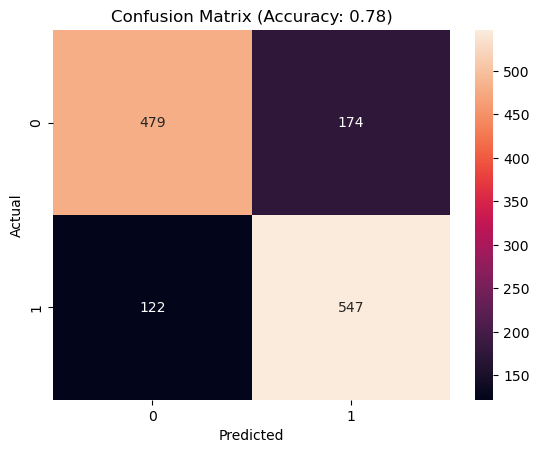

In [38]:
# Another method to evaluate our model, is to calculate the accuracy score & display it along with the confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, pred)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')

# Add labels, title, and accuracy to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')

# Display the plot
plt.show()

**Congratulations, you have just developed your first Machine Learning model!**